<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/1_3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 1.3**

####The Gram-Schmidt orthogonalization process
Let $V$ be a vector space with an inner product. Suppose $\textbf{x}_1,\textbf{x}2,\cdots ,\textbf{x}_n$ is a basis for $V$. Let
\begin{array}\\
\textbf{v}_1 = \textbf{x}_1,\\
\textbf{v}_2 = \textbf{x}_2 −\frac{⟨\textbf{x}_2, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}
\textbf{v}_1,\\
\textbf{v}_3 = \textbf{x}_3-\frac{⟨\textbf{x}_3, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}\textbf{v}_1−\frac{⟨\textbf{x}_3, \textbf{v}_2⟩}{⟨\textbf{v}_2, \textbf{v}_2⟩}\textbf{v}_2,\\
\vdots\\
\textbf{v}_n = \textbf{x}_n-\frac{⟨\textbf{x}_n, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}\textbf{v}_1−\cdots-\frac{⟨\textbf{x}_n, \textbf{v}_{n-1}⟩}{⟨\textbf{v}_{n-1}, \textbf{v}_{n-1}⟩}\textbf{v}_{n-1},\\
\end{array}
Then $\textbf{v}_1,\textbf{v}_2,\cdots,\textbf{v}_n$ is an orthogonal basis for $V$

In [1]:
import numpy as np
def gram_schmidt(V):
    O = np.zeros(V.shape)
    for i in range(V.shape[1]):
        # orthogonalization
        vector = V[:, i]
        space = O[:, :i]
        projection = vector @ space
        vector = vector - np.sum(projection * space, axis=1)
        # normalization
        norm = np.sqrt(vector @ vector)
        vector /=round(abs(norm),ndigits=0)  < 1e-8 and 1 or norm

        O[:, i] = vector
    return O

    # 6 column vectors in 4D, only 3 are independent
vectors = np.array([
    [1, 2, 2, 0, 1, 1],
    [0, 0, 0, 1, 2, 1],
    [1, 2, 3, 1, 3, 2],
    [1, 0, 1, 0, 1, 1]
], dtype=float)
orthonormal = gram_schmidt(vectors)
print(orthonormal)
orthonormal.T @ orthonormal

[[ 5.77350269e-01  4.08248290e-01 -7.07106781e-01  0.00000000e+00
   0.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.33226763e-15  6.66133815e-16]
 [ 5.77350269e-01  4.08248290e-01  7.07106781e-01 -8.88178420e-16
   8.88178420e-16  4.44089210e-16]
 [ 5.77350269e-01 -8.16496581e-01 -1.88411095e-15  1.16573418e-15
  -6.66133815e-16 -6.66133815e-16]]


array([[ 1.00000000e+00, -3.63848840e-16, -2.96825176e-16,
         1.60246891e-16,  1.28197512e-16, -3.84592537e-16],
       [-3.63848840e-16,  1.00000000e+00,  2.08914268e-15,
        -1.31441529e-15,  9.06493304e-16,  5.43895982e-16],
       [-2.96825176e-16,  2.08914268e-15,  1.00000000e+00,
        -6.28036983e-16,  6.28036983e-16,  6.28036983e-16],
       [ 1.60246891e-16, -1.31441529e-15, -6.28036983e-16,
         1.00000000e+00,  1.33226763e-15,  6.66133815e-16],
       [ 1.28197512e-16,  9.06493304e-16,  6.28036983e-16,
         1.33226763e-15,  3.00753220e-30,  1.72563323e-30],
       [-3.84592537e-16,  5.43895982e-16,  6.28036983e-16,
         6.66133815e-16,  1.72563323e-30,  1.28189897e-30]])

In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Theorem 1.3.2 (Normal Equations) <br>
Let $A \in \mathbb{R}^{n\times m}$ be an $n \times m$ matrix with
linearly independent columns and let $\textbf{b} \in \mathbb{R}^n$ be a vector. The solution to the least-squares problem
$$\min_{x\in\mathbb{R}^m}||A\textbf{x}−\textbf{b}||.$$
satisfies
$$A^TA\textbf{x}=A^T\textbf{b}$$
which are known as the normal equations.





In [2]:
import numpy as np
def gram_schmidt(A):
    """Gram-schmidt Orthogonalization"""
    Q=np.zeros_like(A)
    cnt = 0
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            u -= np.dot(np.dot(Q[:, i].T, a), Q[:, i])
        e = u / np.linalg.norm(u)  # normalization
        Q[:, cnt] = e
        cnt += 1
    R = np.dot(Q.T, A)
    return (Q, R)

np.set_printoptions(precision=4, suppress=True)
A = np.array([[1,-1],[1, 0],[1, 1]], dtype = float)

(Q, R) = gram_schmidt(A)
print(Q)
print(R)
print(np.dot(Q, R))
b = np.array([[-4],[4],[6]], dtype = float)
print("Vector b")
print(b)
QT = np.transpose(Q)
print("Q Transposed")
print(QT)
R1 = np.linalg.inv(R)
print("Inverse of R")
print(R1)
print("x = R^-1*Q(Transposed)b")
mult1 = np.dot(QT,b)
mult2 = np.dot(R1,mult1)
print(mult2)

[[ 0.5774 -0.7071]
 [ 0.5774  0.    ]
 [ 0.5774  0.7071]]
[[1.7321 0.    ]
 [0.     1.4142]]
[[ 1. -1.]
 [ 1.  0.]
 [ 1.  1.]]
Vector b
[[-4.]
 [ 4.]
 [ 6.]]
Q Transposed
[[ 0.5774  0.5774  0.5774]
 [-0.7071  0.      0.7071]]
Inverse of R
[[0.5774 0.    ]
 [0.     0.7071]]
x = R^-1*Q(Transposed)b
[[2.]
 [5.]]


##1.3.3 Linear Regression


To estimate $\textbf{b}$ using the Ordinary Linear Regression method, we need to calculate Amean and bmean, the covariance of $A$ and $\textbf{b}$ (Abcov), and the variance of $A$ (Avar) before we can determine the values for $\alpha$ and $\beta$.

alpha = 1.0751530850525142
beta = 3.022939686709276


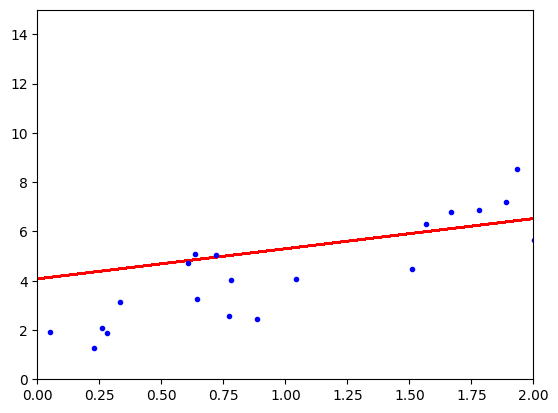

In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Generate 'random' data
np.random.seed(0)
A = 5 * np.random.randn(100)
res = np.random.randn(100)
b = 1 + 3 * A + res

# Create pandas dataframe to store our A and b values
df = pd.DataFrame(
    {'A': A,
     'b': b}
)

# Show the first five rows of our dataframe
df.head()
# Calculate the mean of A and b
Amean = np.mean(A)
bmean = np.mean(b)

# Calculate the terms needed for the numator and denominator of beta
df['Abcov'] = (df['A'] - Amean) * (df['b'] - bmean)
df['Avar'] = (df['A'] - Amean)**2

# Calculate beta and alpha
beta = df['Abcov'].sum() / df['Avar'].sum()
alpha = bmean - (beta * Amean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

# get a prediction
ypredict = alpha + beta * A

plt.plot(A, ypred, "r--")
plt.plot(A, b, "b.")
plt.axis([0, 2, 0, 15])
plt.show()